# Elizabeth Walter

# Homework 3: Data Analysis with Pandas, Numpy, and Matplotlib

## Learning Goals
* **Load data into notebooks using Pandas**
* **Determine the components of the data**
* **Make meaningful representations of the data and draw conclusions from them**
* **Compute statistical quantities for the given data set and draw conclusions from them**

## Introduction
You are a sports analyst covering the International Powerlifting Federation World Championships. You've been invited to the live stream of the event to talk about who should be crowned the "best lifter" of the competition. Your task is to look at the data from previous competitions and make an argument for who is the best lifter.

### Basics of Powerlifting
Powerlifting is a strength sport in which lifters compete for the highest total across their squat, bench press, and deadlift. Each competitor gets three attempts at each lift (squat, bench, and deadlift), and the best of the three attempts on each lift are added up to the competitor's "Total." The competitors are divided up into weight classes, and the competitor with the highest total in their weight class wins. If a lifter misses all three attempts for a squat, bench, or deadlift, they are disqualified and do not get a Total. A miss is any attempt that a competitor fails to complete as judged by the referees. For a more in depth introduction to powerlifting and description of how the squat, bench, and deadlift are executed, check out [this article](https://www.bodybuilding.com/fun/issa119.htm).

### The Open Powerlifting Project
OpenPowerlifting is a community service project to create a permanent, open archive of the world's powerlifting data. That means that everyone's powerlifting meet data from your friendly neighborhood gym hobbyist competitor to elite strength athletes is available for anlaysis. The data you will use in this assignment can be found at https://data.openpowerlifting.org. This particular data set includes all of the worldwide powerlifting meet data from the International Powerlifting Federation for the past several years.

## Assignment Goal
Analyze powerlifting data to determine who is the "best lifter" across all weight classes.

Work through the following assignment, making sure to follow all the directions and answer all the questions.

**This assignment is due at 11:59 pm on March 12th.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3.  Submission instructions can be found at the end of the notebook.

---
## Grading

* Academic Integrity (2 points)
* Part 1 (15 points)
* Part 2 (16 points)
* Part 3 (13 points) + 5 points optional extra credit

Total points possible: **46**

---

---
# Academic integrity statement (2 points)

In the markdown cell below, put your personal academic integrity statement (composed during the Day04 In-Class Assignment). By including this statement, you are confirming that the work you submit in the assignment is wholly your own.  


<font size=6 color="#009600">&#9998;</font> I, __Elizabeth Walter__, value honesty, fairness, integrity, and equity above little else. I expect these things from myself and my community, and cheating, along with other unethical behavior, is incompatible with such values. I commit to being fair and honest by completing all my assignments myself and citing sources when I receive help. I am aware of and will abide by the MSU ethical standards for integrity.

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Getting a Feel for the Data

Before doing any data analysis, you should determine what your data looks like!

### &#9989;&nbsp; Task 1.1 (3 points)
**Task: Write a piece of code that reads in the data file `openpowerlifting_data.csv` and prints out the descriptive information about the data (e.g., Columns, number of entries, mean values, etc.).  Write a print statement that prints the number of lifters in this dataset.** 

**NOTE:** From your previous work with this data, you recall the following:
* A minus sign in front of a lift (i.e. -200.0) means a missed/failed lift
* The weight class, best squat, best bench, best deadlift, and total measurements are in kilograms (kg)
* The IPF weight classes for women are: 47 kg, 52 kg, 57 kg, 63 kg, 72 kg, 84 kg, 84 kg+ 
* The IPF weight classes for men are: 59 kg, 66 kg, 74 kg, 83 kg, 93 kg, 105 kg, 120 kg, 120 kg+ 
* Competitors are assigned to a weight class by the nearest class **above** their bodyweight (i.e. if they weigh 50.25 kg, their weight class is the 52 kg class) with the exception of competitors in the 84kg+ of 120kg+ categories where the competitors have bodyweights **greater** than the listed weight class.

In [210]:
powerlifting = pd.read_csv('openpowerlifting_data.csv', delimiter = ',') #read in data file
print('there are', len(powerlifting.index), 'competitors in this dataset') # from: https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
powerlifting.describe()

there are 76343 competitors in this dataset


,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots
count,55736.000000,76246.000000,74992.000000,74777.000000,74462.000000,73719.000000,73660.000000
mean,28.711156,83.144281,170.861872,113.722694,198.497387,484.475828,357.762924
std,8.311594,21.464455,61.529049,45.042623,61.790513,158.048925,65.782236
min,9.500000,22.680000,-330.000000,-225.000000,-320.000000,60.000000,44.890000
25%,23.500000,67.150000,122.500000,75.000000,150.000000,347.500000,314.880000
50%,27.500000,81.650000,172.500000,115.000000,202.500000,497.500000,359.395000
75%,32.500000,94.450000,215.000000,145.000000,245.000000,600.000000,402.890000
max,81.500000,220.000000,477.500000,322.500000,417.500000,1105.000000,582.150000


### &#9989;&nbsp; Task 1.2 (3 points)
**Choose one of the lifts (i.e., squat, bench, or deadlift) and make a scatter plot of best lift weight vs competitor bodyweight.** (Be sure to label your axes)

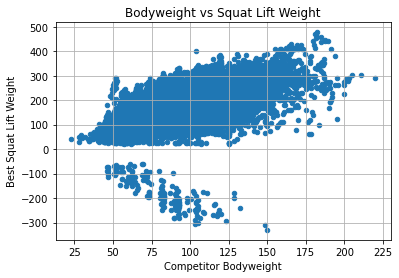

In [190]:
powerlifting.plot.scatter(x='BodyweightKg',y='Best3SquatKg')
plt.xlabel('Competitor Bodyweight')
plt.ylabel('Best Squat Lift Weight')
plt.title('Bodyweight vs Squat Lift Weight')
plt.grid()
plt.show()

### &#9989;&nbsp; Task 1.3  Better Data Visualization (6 points)
You may notice that with so many data points, it is hard to get a feel for how the data is distributed. This is sometimes referred to as "overplotting" meaning that there are so many data points on the plot, it is hard to discern any information about them. One way around this is to "bin" the data, meaning that instead of plotting all of the data points, we can establish a grid of bins over the range of the data and instead plot how many points fall into each of those bins. We call this a 2D histogram!

**Your task is to use the provided basic example to create your own 2D histogram of the scatter plot you made in Task 1.2.**

Text(0, 0.5, 'y')

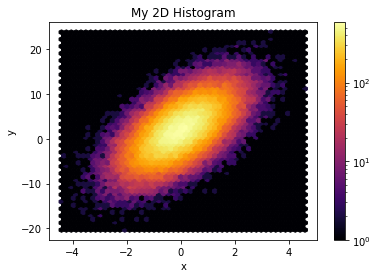

In [191]:
###A Basic Example 
#see documentation at https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hexbin.html
#for more information
##demo adapted from https://matplotlib.org/3.1.0/gallery/statistics/hexbin_demo.html

import matplotlib.colors as colors #imports some extra functionality 
                                   #we'll use for the color map

n = 100000
x_data = np.random.standard_normal(n) #generates random x data
y_data = 2.0 + 3.0 * x_data + 4.0 * np.random.standard_normal(n) #generates random y data

plt.subplot(111) #creates the figure

'''Creates a 2D histogram with hexagonal bins. 
The norm argument is set to log scaling to emphasize the distribution in counts. 
The cmap argument is the color map (you can change this if you want to).
The gridsize argument is how many bins are on the x and y axis, you will want to adjust this
for your own plots to determine what number of bins makes sense for your data.'''
plt.hexbin(x_data, y_data, gridsize=50, cmap='inferno',norm=colors.LogNorm())

plt.title("My 2D Histogram") #makes a title
plt.colorbar() #adds a colorbar to the plot to indicate how counts relate to color
plt.xlabel('x') #labels x axis
plt.ylabel('y') #label y axis

Text(0, 0.5, 'Best Squat Lift Weight')

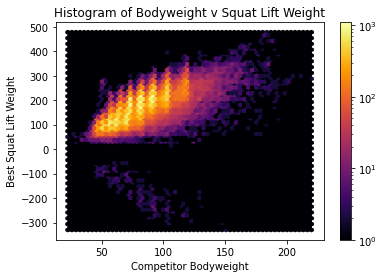

In [192]:
import matplotlib.colors as colors

plt.hexbin(powerlifting['BodyweightKg'], powerlifting['Best3SquatKg'], gridsize=60, cmap='inferno',norm=colors.LogNorm())

plt.title("Histogram of Bodyweight v Squat Lift Weight") 
plt.colorbar()
plt.xlabel('Competitor Bodyweight')
plt.ylabel('Best Squat Lift Weight')

### &#9989;&nbsp; Task 1.4 (3 points)
**Examine your plots from the first two tasks. What does the distribution of the bodyweight vs. lift data look like? How does adjusting the bin size affect what you see? Describe any features you think may be important. How does the lift you chose change with bodyweight? What is a possible explanation for what you observe?**

<font size=6 color="#009600">&#9998;</font> 
- The data is most concentrated between 50 and ~125 kg for bodyweight and roughly 50 and 350 for squat weight, shows that for most of the data, the squat weight increases with competitor weight. After ~ 125 kg in bodyweight, there is a vertical cutoff, after which data is much less concentrated and becomes even more so as bodyweight continues to increase. You can see that the frequency of values is smaller at the upper and lower bounds of the distribution. There is also a group of people with negative squat lift weights that also increase, but instead negatively, with bodyweight. We see though that this group does not contain a large number of the total data points bc it does not appear with great frequency.
- There is less detail distinguishing the distribution of the data with fewer bins. The scale changes with changes in the bins, so the colors represent a different number of counts when you change the bins. 

# Part 2: Data Filtering and Analysis

## 2.1 Cleaning and Filtering

Often when presented with a data table, additional cleaning and filtering may be required before you can analyze the data the way you want to. There are many ways to do this, but most involve "masking" the data in some way--removing everything from your data except the values that you want, usually based on some condition.

### &#9989;&nbsp; Task 2.1.1 (2 points)
**In your exploration in Part 1, you may have noticed some entries for competitors who did not achieve a total, create a new data frame that contains only competitors with a valid total. Hint: There are built in Pandas functions that can help you with this.**

In [193]:
#all of the NaN entries
#drop na
powerlifting2 = powerlifting.dropna() # creates new dataframe that doesn't have the empty/missing values
powerlifting2.describe()

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,29.161846,83.342764,184.945056,122.782599,210.715319,518.442837,385.758483
std,8.542649,23.538092,63.506288,47.167571,63.283774,168.619044,66.132889
min,9.500000,30.000000,25.000000,20.000000,22.500000,115.000000,109.200000
25%,23.500000,65.300000,132.500000,80.000000,157.500000,375.000000,343.190000
50%,27.500000,81.500000,185.000000,125.000000,215.000000,527.500000,389.210000
75%,33.500000,97.100000,230.000000,160.000000,260.000000,650.000000,432.870000
max,81.500000,202.500000,477.500000,322.500000,417.500000,1105.000000,582.150000


### &#9989;&nbsp; Task 2.1.2 (2 points)
The next task in this assignment will require you to do analysis on ***one*** weight class. **Create a new dataframe for the weight class that you want to work with.**

Recall that the weight classes we want to focus on in this dataframe are:

* Women: 47 kg, 52 kg, 57 kg, 63 kg, 72 kg, 84 kg, 84 kg+ 
* Men: 59 kg, 66 kg, 74 kg, 83 kg, 93 kg, 105 kg, 120 kg, 120 kg+

In [194]:
#masking - use dataframe and column 'WeightClassKg', plus a value from said column

mask_wc = powerlifting2['WeightClassKg'] == '47' # creates a variable that stores a list of t/f values where 'true' when i in column 'WeightClassKg' is 47
wc47_frame = powerlifting2[mask_wc] # creates a dataframe containing only the rows from the original df where 'WeightClassKg' = 'True' 
wc47_frame

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Country,Date
1,Patrycja Nowak,F,Raw,25.5,Open,45.40,47,62.5,40.0,100.0,202.5,272.34,Poland,2014-03-28
106,Ewa Mioduszewska,F,Raw,27.5,Open,46.80,47,102.5,50.0,138.0,290.5,381.92,Poland,2017-04-01
107,Paulina Grzybek,F,Raw,22.5,Open,47.00,47,102.5,55.5,122.5,280.5,367.61,Poland,2017-04-01
108,Alicja Mułyk,F,Raw,22.5,Open,46.70,47,97.5,47.5,117.5,262.5,345.66,Poland,2017-04-01
109,Nina Skalska,F,Raw,27.5,Open,44.50,47,90.0,55.0,107.5,252.5,344.79,Poland,2017-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75941,Analia Figueroa,F,Raw,33.0,Open,46.20,47,110.0,52.5,142.5,305.0,404.85,Argentina,2018-10-05
75942,Madelein Canto,F,Raw,28.5,Open,46.30,47,97.5,55.0,125.0,277.5,367.76,Argentina,2018-10-05
75989,Madelein Canto,F,Raw,30.0,Open,46.50,47,100.0,52.5,130.0,282.5,373.18,Argentina,2019-11-01
76191,Noémie Allabert,F,Raw,26.5,Open,46.62,47,110.0,62.5,145.0,317.5,418.61,France,2017-10-25


### &#9989;&nbsp; Task 2.1.3 (2 points)
**How many entries are in your cleaned dataframe? How do you know that your masking is working?**

<font size="+3">&#9998;</font> 
- There are 639 competitors in the cleaned dataframe. There are 8946 entries/elements in the cleaned dataframe. 
- The weight class I chose was 47 kg. Only women have a 47 kg weight class. All of the values in 'Sex' = F, all the values in 'WeightClassKg' = 47, and all of my columns are still there.

### &#9989;&nbsp; Task 2.2 Means, Medians, and Standard Deviation (7 points)
One way to visualize the distribution of data is with one-dimensional histograms (Pandas, NumPy, and Seaborn have ways of doing this). 

**Plot a one-dimensional histogram of totals for the weight class you chose.**

**For your weight class, calculate the mean and median of the total and plot them as a vertical lines on your histogram.**

**Calculate the standard deviation and plot it as a vertical band about the mean.**

mean of total: 269.8286384976526
median of total 272.5
std of TotalKg: 52.12014372881837
mean +/ 1 stand dev: 217.70849476883424 321.948782226471
mean +/ 2 stand devs: 165.58835104001588 374.06892595528933


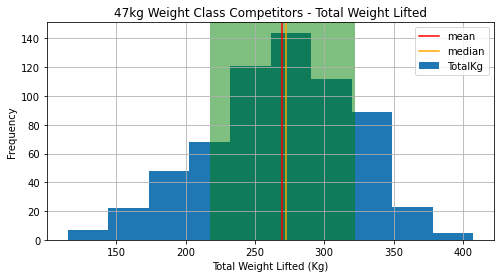

In [195]:
# create histogram
plt.figure(figsize=(8,4))
wc47_frame['TotalKg'].plot.hist(title='47kg Weight Class Competitors - Total Weight Lifted')
plt.xlabel('Total Weight Lifted (Kg)')
plt.grid()


# calculate mean, median of totals
meantotal = wc47_frame['TotalKg'].mean()
mediantotal = wc47_frame['TotalKg'].median()

print('mean of total:', meantotal) # mean of series 'TotalKg' in dataframe
print('median of total', mediantotal) # median of series

# plot mean, median as vertical lines
plt.axvline(x=wc47_frame['TotalKg'].mean(),color='red',label='mean') # function from day 9 in class assignment
plt.axvline(x=wc47_frame['TotalKg'].median(),color='orange',label='median')
plt.legend()

# calc std
stdtotal = wc47_frame['TotalKg'].std()
print('std of TotalKg:', stdtotal)

# plot std as vertical band abt mean - show distribution using x bar - s and x bar + s, so that'll be the width of the band
minus = meantotal - stdtotal
plus = meantotal + stdtotal
print('mean +/ 1 stand dev:', minus, plus)
minus2 = meantotal - (2 * stdtotal)
plus2 = meantotal + (2 * stdtotal)
print('mean +/ 2 stand devs:', minus2, plus2)

plt.axvspan(xmin = minus, xmax = plus, facecolor='g', alpha=.5) #from: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvspan.html#matplotlib.pyplot.axvspan
plt.show()

### &#9989;&nbsp; Task 2.2.1 (3 points)

**What do you observe about the distribution of your weight class? Are there differences between your mean and median? Why or why not? What does the standard deviation tell you about the distribution?**

<font size=6 color="#009600">&#9998;</font> 
- unimodal roughly about mean, skewed slightly left but generally normal distribution. Because of this, the median is very slightly > than the mean (2.67 points greater).
- standard deviation is 52.120, which tells us that each total kg value lies 52.120 points from the mean, on average. Because of the data's normal distribution, a standard deviation of 52.12 tells us that roughly 68% of our values fall between 217.71 and 321.95 kg (roughly 68% of competitors have totals between 217.71 and 321.95 kg), and roughly 95% fall between 165.59 and 374.07 kg.

# Part 3: Putting it all Together

## 3.1 Speeding up/Automating the process

For your "best lifter" analysis, you'll need the information you found in Part 2 for all weight classes. 

### &#9989;&nbsp; Task 3.1.1 Expanding to all weight classes (2 points)

**Step 1: Write a function to create a new dataframe(s) for a given weight class.** (Inputs should be base dataframe and weight class; Output should be a new dataframe containing only that weight class.)

*Use examples to justify that your dataframes have been created correctly.*

In [196]:
# inputs: base dataframe, weight class
# output: new dataframe of weight class
# making a function that repeats masking process for each

def maskfunc(df, w_c): 
    mask = df['WeightClassKg'] == w_c
    new_frame = df[mask]
    
    return new_frame

# List to help extract information from the base dataframe
weight_class_list = ['47', '52', '57', '63', '72', '84', '84+', '59', '66', '74', '83', '93', '105', '120', '120+']
frame_names_list = ['class_47kg','class_52kg','class_57kg','class_63kg','class_72kg','class_84kg','class_84pluskg',\
                    'class_59kg','class_66kg','class_74kg','class_83kg','class_93kg','class_105kg','class_120kg','class_120pluskg']

In [197]:
maskfunc(powerlifting2, '63') # checking

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Country,Date
16,Olga Ciborowska,F,Raw,22.5,Open,62.30,63,95.0,55.0,135.0,285.0,308.62,Poland,2014-03-28
17,Agnieszka Tuczykont,F,Raw,28.5,Open,61.80,63,80.0,97.5,97.5,275.0,299.28,Poland,2014-03-28
120,Karolina Radgowska,F,Raw,24.5,Open,62.60,63,137.5,65.0,177.5,380.0,410.29,Poland,2017-04-01
121,Emilia Sobiech-Konopa,F,Raw,28.5,Open,62.10,63,137.5,72.5,157.5,367.5,398.75,Poland,2017-04-01
122,Aleksandra Gudecka,F,Raw,32.5,Open,62.30,63,102.5,67.5,125.0,295.0,319.45,Poland,2017-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76194,Safia Kouri,F,Raw,42.5,Open,61.75,63,152.5,65.0,170.0,387.5,421.92,Algeria,2017-10-25
76283,Safia Kouri,F,Raw,45.0,Open,62.45,63,155.0,75.0,190.0,420.0,454.14,Algeria,2019-10-02
76312,Laura Newman,F,Raw,32.5,Open,62.70,63,132.5,65.0,162.5,360.0,388.31,South Africa,2016-10-20
76313,Safia Kouri,F,Raw,38.5,Open,61.55,63,130.0,57.5,145.0,332.5,362.76,Algeria,2016-10-20


**Step 2: Loop through all the weight classes and store the dataframes for each weight classs in a list** (Lists can store all types of variables including Pandas dataframes!)

In [198]:
wc_frames = [] # initialize new list for dataframes to be stored in. 
                # Will be appended to while looping
# use function from above to append the dataframes for each weight class (each i in weight_class_list) to the list
# appending values - need to store the frames computed by the function in a variable?

for i in weight_class_list:
    f = maskfunc(powerlifting2, i)
    wc_frames.append(f)
wc_frames[0].describe() #dataframe for wc 47 to check

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,28.187011,46.033239,94.384977,57.426448,118.017214,269.828638,358.633991
std,8.860500,1.343043,19.919363,13.508969,23.151820,52.120144,67.177498
min,11.500000,34.500000,35.000000,20.000000,50.000000,115.000000,170.750000
25%,22.500000,45.850000,80.000000,47.500000,102.500000,237.500000,317.810000
50%,26.500000,46.410000,95.000000,57.500000,120.000000,272.500000,361.830000
75%,33.500000,46.745000,110.000000,67.500000,135.000000,308.250000,407.580000
max,73.500000,47.000000,152.500000,95.500000,176.000000,407.500000,537.790000


### &#9989;&nbsp; Task 3.1.2 Expanding statistics to all weight classes (2 points)
**Write a function to calculate the mean, median, and standard deviation for a single weight class. Then, write a loop through all of the weight classes and save the results of your calculations for plotting.**

In [199]:
def total_stats(wc_frames):
    mean_total_class = wc_frames['TotalKg'].mean() # get mean of 'TotalKg' in weight class i
    median_total_class = wc_frames['TotalKg'].median() # median of 'TotalKg' in weight class i
    std_total_class = wc_frames['TotalKg'].std() # median of 'TotalKg' in weight class i

    return mean_total_class, median_total_class, std_total_class # returns mean, median, std of "TotalKg" for weight class i

wc_mean_total = [] # list containing mean totals for all weight classes
wc_median_total = [] # list median totals for all weight classes
wc_std_total = [] # list std totals for all weight classes

for i in wc_frames:
    mean,median,std = total_stats(i)
    wc_mean_total.append(mean)
    wc_median_total.append(median)
    wc_std_total.append(std)

In [200]:
# printed the 3 lists then went through a few of the weight class df's to compare the values and make sure they matched

print('means:', wc_mean_total)
print('medians:', wc_median_total)
print('standard deviations:', wc_std_total)
wc_frames[4].describe()

means: [269.8286384976526, 303.4903047091413, 314.6959833795014, 334.16043456291055, 355.36387406616865, 380.2760103181427, 415.8400229357798, 431.2090909090909, 492.719320066335, 539.3234309623431, 576.4308791550171, 616.9833521444696, 657.252816434725, 697.4446375372394, 757.5194850382742]
medians: [272.5, 300.0, 315.0, 337.5, 355.0, 380.0, 412.5, 435.25, 492.5, 540.0, 580.0, 622.5, 660.0, 707.5, 762.5]
standard deviations: [52.12014372881837, 70.92923726426531, 60.56902179366939, 62.765957135533874, 67.23099419140634, 68.85162275387232, 83.06290710295667, 96.14266826477763, 89.67599927707674, 86.41583852825654, 89.74044970249875, 93.85441163644398, 96.81518654149635, 105.76717834209622, 114.7249039634735]


,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots
count,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,29.540822,69.305827,128.557898,75.126254,151.679242,355.363874,361.277268
std,8.126211,2.302129,27.420515,17.499064,28.538365,67.230994,66.733141
min,13.500000,63.030000,30.000000,30.000000,47.500000,157.500000,160.400000
25%,24.000000,68.000000,110.000000,62.500000,135.000000,312.500000,317.785000
50%,27.500000,70.030000,130.000000,75.000000,150.000000,355.000000,362.300000
75%,34.000000,71.100000,145.000000,85.000000,170.000000,400.000000,404.457500
max,67.500000,72.000000,210.000000,132.500000,250.000000,562.500000,560.190000


### &#9989;&nbsp; Task 3.1.3 Visualizing the Data (1 point)
**Plot mean total (with error bars) versus all of the weight classes.** When successful, your plot should look something like this:
<img src="https://raw.githubusercontent.com/roboe92/CMSE_EDR/main/functions_interview_images/TotalVClass.png">

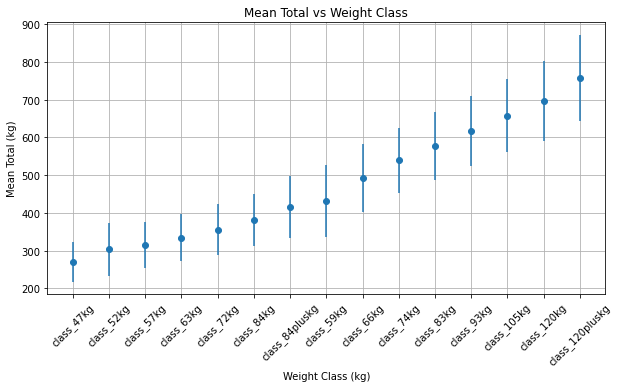

In [201]:
# got direction on which function to use from help room
# used https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html to learn function & parameter definitions

plt.figure(figsize=(10,5))
plt.errorbar(frame_names_list, wc_mean_total, yerr = wc_std_total, fmt='o') # yerr of each w.c.'s mean total = w.c.'s std bc std gives distribution of variation about the mean 
plt.ylabel('Mean Total (kg)')
plt.xlabel('Weight Class (kg)')
plt.title('Mean Total vs Weight Class')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [202]:
no_comp = [] # number of competitors in wc, for all weight classes
wc_std_bw = [] # std of bodyweight in each wc

def comp_n_bw(wc_frames):
    count = len(wc_frames.index)
    std_bw_class = wc_frames['BodyweightKg'].std()
    return count, std_bw_class

for i in wc_frames:
    c,b = comp_n_bw(i)
    no_comp.append(c)
    wc_std_bw.append(b)

In [203]:
for i in range(len(no_comp)):
    print([i], 'wc:', weight_class_list[i], '# competitors', no_comp[i], 'bwstd:', wc_std_bw[i], 'tstd:', wc_std_total[i])
wc_frames[5].describe()

[0] wc: 47 # competitors 639 bwstd: 1.3430426752464808 tstd: 52.12014372881837
[1] wc: 52 # competitors 1083 bwstd: 0.9831775199055025 tstd: 70.92923726426531
[2] wc: 57 # competitors 1444 bwstd: 1.1666973976203585 tstd: 60.56902179366939
[3] wc: 63 # competitors 1979 bwstd: 1.3739669476694791 tstd: 62.765957135533874
[4] wc: 72 # competitors 1874 bwstd: 2.3021289350802094 tstd: 67.23099419140634
[5] wc: 84 # competitors 1163 bwstd: 3.5064868820561292 tstd: 68.85162275387232
[6] wc: 84+ # competitors 872 bwstd: 16.69429580869038 tstd: 83.06290710295667
[7] wc: 59 # competitors 770 bwstd: 2.4282584968128256 tstd: 96.14266826477763
[8] wc: 66 # competitors 1206 bwstd: 1.2353109761315209 tstd: 89.67599927707674
[9] wc: 74 # competitors 2390 bwstd: 1.5127244422273087 tstd: 86.41583852825654
[10] wc: 83 # competitors 3219 bwstd: 1.9002282728169269 tstd: 89.74044970249875
[11] wc: 93 # competitors 3544 bwstd: 2.236751461711097 tstd: 93.85441163644398
[12] wc: 105 # competitors 3018 bwstd: 3.

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots
count,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000
mean,30.142304,79.742752,139.411436,80.083835,160.781599,380.276010,358.866647
std,7.991077,3.506487,28.955993,18.347034,28.148840,68.851623,63.004380
min,14.500000,66.600000,40.000000,27.500000,55.000000,150.000000,149.170000
25%,24.500000,77.000000,120.000000,67.500000,140.000000,335.000000,316.810000
50%,28.500000,80.800000,140.000000,80.000000,160.000000,380.000000,358.860000
75%,35.000000,82.785000,160.000000,90.000000,180.000000,427.500000,402.835000
max,64.500000,84.000000,243.000000,147.500000,252.500000,613.000000,567.130000


### &#9989;&nbsp; Task 3.1.3.1  Making Observations (1 point)
**Describe any trends you see in the data and propose an explanation for what you observe**

<font size=6 color="#009600">&#9998;</font>
- On average, the mean total and standard deviation of the totals for a weight class increases as weight class increases.
    - The increase in mean total with weight class could indicate that on average a higher bodyweight translates to greater strength/ability to lift weight.
    - There seems to be little relationship between the number of competitors in the weight class and the variation of standard deviations of totals across weight classes, but it appears as though the variation of standard deviations of totals across weight classes may be caused in part by the variation of standard deviations of bodyweight across weight classes (an increase in variance of competitor totals within a weight class may be in part caused by an increase in the variance of competitor bodyweights within a weight class, so the variance of the standard deviations of bodyweights across weight classes may be in some part related to the variance of the standard deviations of totals across weight classes).

### &#9989;&nbsp; Task 3.2 Determining the Strongest Competitors (2 points)

You may have noticed that on average, higher weight classes have higher totals. However, you know that in powerlifting, the "best lifter" award goes to the person who is strongest for their size, not just the person with the biggest total. There are many ways used in powerlifting to compare strength across weight classes, but here, we'll just use pound-for-pound strength (i.e. Total Lifted(kg)/Bodyweight(kg)).

**Calculate the "pound-for-pound" mean for each weight class and plot them. Include comments in your code that explain the decisions you made.**

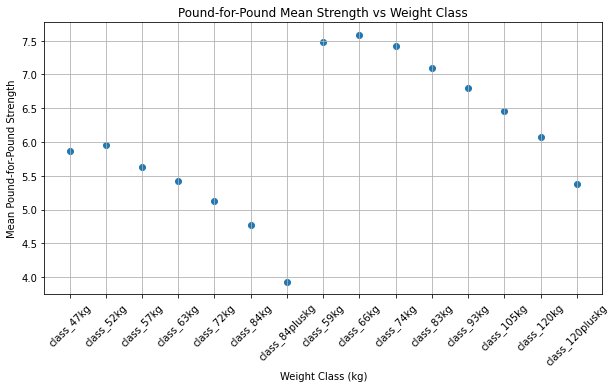

mean bw, wc 52: 51.02373961218834 mean bw, wc 66: 64.93274461028189


In [204]:
# do again what we did above to get weight class df list and mean totals list: 
        # - initialize a list, 
        # - make a function, 
        # - then loop through wc_frames and append values to new list

wc_pfp = [] #list for pound for pound mean of each weight class


def pfpfunc(wc_frames):
    mean_bw_class = wc_frames['BodyweightKg'].mean() # creates variable for weight class mean bodyweight values. mean bc we are looking across weight classes, also need means to calc mean pfp means
    mean_total_class = wc_frames['TotalKg'].mean() # put this variable in again bc it was created in a different fuction and not outside of it
    mean_pfp_class = mean_total_class / mean_bw_class # create variable for weight class mean pound for pound strength values
    
    return mean_bw_class, mean_pfp_class

# loop through weight classes, using function to get each classes pfp mean and appending each one to the list
wc_bw = [] #list for mean bodyweight of each class

for i in wc_frames:
    mean_bw,mean_pfp = pfpfunc(i)
    wc_pfp.append(mean_pfp)
    wc_bw.append(mean_bw)
    
    
# plot list wc_pfp against weight classes. 

plt.figure(figsize=(10,5))
plt.scatter(frame_names_list, wc_pfp)  
plt.ylabel('Mean Pound-for-Pound Strength')
plt.xlabel('Weight Class (kg)')
plt.title('Pound-for-Pound Mean Strength vs Weight Class')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

print('mean bw, wc 52:', wc_bw[1], 'mean bw, wc 66:', wc_bw[8])

### &#9989;&nbsp; Task 3.2.1 (1 point)
**Describe any similarities or differences you see in the pound-for-pound mean calculation results across weight classes and genders.**

<font size=6 color="#009600">&#9998;</font> 
- Across their comparable weight classes (47kg class vs 59kg class, 52 kg class vs 66kg class, etc), the men had greater pound-for-pound strength means than the women.
- The trend of the plots of p-p mean strength vs weight class for men is roughly the same as for women - The distribution of the mean p-p ratio across the male group is similar to that of the female group, but the ratio values are proportionally larger in the male group.
- The data for the set of male weight classes and set of female weight classes both show an increase from the first to second weight class; then a decrease from weight class to weight class for 2nd - 7th classes, with the amount it decreases by roughly the same across that range (more uniform in the men's group); then a decrease of greater magnitude from the 84/120kg class to 84+/120+kg class than the decreases between the previous classes, respectfully.
- The shape of the plots indicates diminishing returns to total lift weight when bodyweight is greater than 51.02 kg and 64.93 kg for women and men, respectfully.

### &#9989;&nbsp; Task 3.2.2 (2 points)

**Find the maximum total for each weight class, calculate the pound-for-pound value for each maximum. Make a single plot with the pound-for-pound ratio vs weight class (from task 3.2 above) and with the maximum pound-for-pound ratio vs weight class.**  Be sure to label all axes and include a legend.

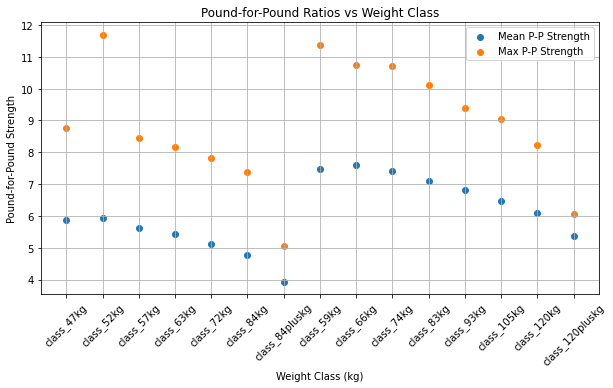

In [205]:
# function to get pfp
# not sure if 'Find the maximum total for each weight class' means just 'find' it inside the function or find them and put them in a list so did that too
def maxpfpfunc(wc_frames):
    max_total_class = wc_frames['TotalKg'].max() # get the max total of the df
    mt_bw_class = wc_frames['BodyweightKg'].where(wc_frames['TotalKg'] == max_total_class).dropna().values[0] # need to use bodyweight of competitor with max total
    max_pfp_class = max_total_class / mt_bw_class                        # ^ almost had the whole line figured out but didnt have the .dropna().values[0] part, got it from: https://stackoverflow.com/questions/49738053/python-dataframe-finding-a-value-in-same-row-as-a-defined-value-in-a-different 
    mt_name_class = wc_frames['Name'].where(wc_frames['TotalKg'] == max_total_class).dropna().values[0]
    
    return max_pfp_class, max_total_class, mt_bw_class, mt_name_class

wc_max_pfp = [] # list of p-p ratio of max total for each wc
wc_max_total = [] # list of max totol for ea wc
wc_mt_bw = [] # list of max total's corresponding bodyweight for each wc
wc_mt_name = [] # list of competitor with max total for each wc

for i in wc_frames:
    max_pfp, max_total, mt_bw, mt_name = maxpfpfunc(i)
    wc_max_pfp.append(max_pfp)
    wc_max_total.append(max_total)
    wc_mt_bw.append(mt_bw)
    wc_mt_name.append(mt_name)
    
plt.figure(figsize=(10,5))
plt.scatter(frame_names_list, wc_pfp, label='Mean P-P Strength') 
plt.scatter(frame_names_list, wc_max_pfp, label='Max P-P Strength')
plt.ylabel('Pound-for-Pound Strength')
plt.xlabel('Weight Class (kg)')
plt.title('Pound-for-Pound Ratios vs Weight Class')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

In [206]:
# checked values in list by, for a few of the dataframes, finding value of max and its index name and then using that index name to find the corresponding bodyweight value, then dividing total/bodyweight 
# if an inc in bw -> dec in p-p strength, and p-p strength is 
print('max pp list:', wc_max_pfp) 
print('max total index:', wc_frames[1]['TotalKg'].idxmax(), 'max total:', wc_frames[1]['TotalKg'].max())
print('bodyweight:', wc_frames[1]['BodyweightKg'].loc[65257])
print('calculated max pp:', wc_max_total[1] / wc_frames[1]['BodyweightKg'].loc[65257])

max pp list: [8.752147766323024, 11.695906432748538, 8.434271464196652, 8.158730158730158, 7.816842690383547, 7.3810957254665865, 5.060286360211003, 11.364406779661017, 10.730038022813687, 10.71864406779661, 10.127659574468085, 9.399308556611928, 9.041164658634539, 8.22407127248277, 6.062767475035663]
max total index: 65257 max total: 600.0
bodyweight: 51.3
calculated max pp: 11.695906432748538


### &#9989;&nbsp; Task 3.2.3 (1 point)
**Describe any similarities or differences between the pound-for-pound ratio for the means and the maximums. Is the pound-for-pound ratio sufficient to crown the "best lifter"? Why or why not?**

<font size=6 color="#009600">&#9998;</font> 

- Similarities: difference in max and mean p-p is roughly the same for classes 3,4,5,6 of each gender (and class 1 of womens'). Change in p-p from 2nd to last weight class to last weight class much larger for max p-p than mean p-p.
- Differences: Due to what is probably an outlier, or even possibly an error, the max p-p of the 52 kg weight class is the largest value for max p-p of all the weight classes, male and female. In the mean p-p ratio distribution, the largest value for the each group was in the 2nd wc, so while the largest value for the women's group was in the 52 kg wc, the largest value across both groups was the 2nd wc in the men's group (66 kg). 
    - In the max p-p ratio distribution, the value of the 66 kg weight class is disproportionally smaller than what the rest of the distribution suggests it should be, just as the value in the 52 kg weight class is disproportionally larger.

- I think so, because I think that relative strength is a better indicator than max weight, but I'm sure weightlifters wouldn't agree with me. From my experience, in order to acheive a new weightlifting goal, individuals stress the need to 'bulk up' (increase bodyweight in general, not neccessarily pack on more muscle) to do so. Not only does this encourage them to leave their weight class in order to lift more overall instead of getting relatively stronger and increasing their total within their weight class, but it could in part explain why 
    - Further, if the focus of the competitions will continue to be on the true maximum values (in ea class) then comparing p-p ratios across weight classes doesn't matter. 

### &#9989;&nbsp; OPTIONAL EXTRA CREDIT: Task 3.3 Drawing Conclusions (5 points)

It turns out that you have had powerlifting's current way of equalizing lifters across across genders and weight classes all along in the form of the DOTS Formula. Powerlifting has a long history of trying to solve the problem of who the "best lifter" is, and the current accepted metric is the [DOTS formula](https://linktr.ee/cpt_timmy). 

**Find the maximum DOTS score for each weight class ('Dots' in the dataframe) and the corresponding total and person who lifted that total. Compare that to the maximum total and corresponding pound-for-pound ratio (and the person who lifted that total). What do you observe in each weight class? Across all weight classes? Who will you tell your boss is the best lifter across all weight classes and by which metric? Use plots, code, and explanations to justify your answer. ** (Hint: This problem has several parts. Break this into sub-problems and use pseudocode to accomplish.)

### Grading
* 3.3 (5 points)

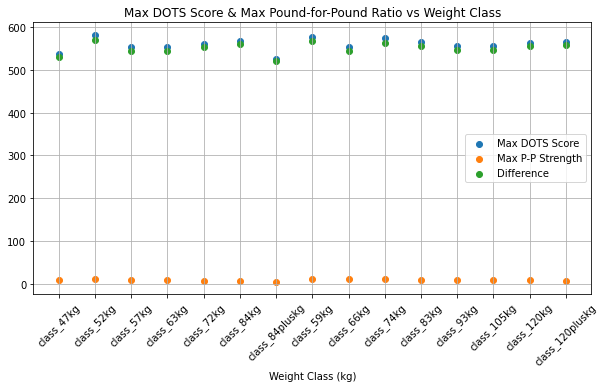

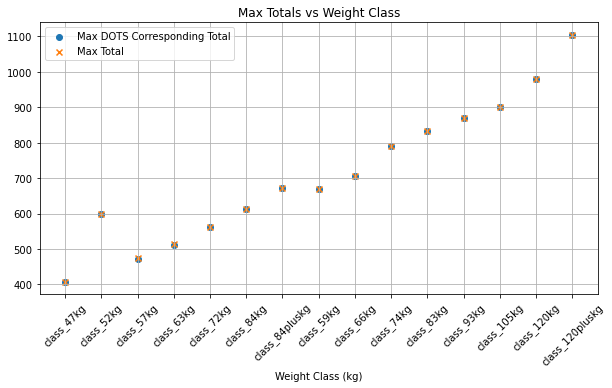

In [207]:
# function to get max dots score for ea wc., total, and person; 
# will use to create a list of max DOTS scores and corresponding values like I did for others before 

def dotsfunc(wc_frames):
    max_dots_class = wc_frames['Dots'].max() # get max DOTS score of each weight class
    mdots_totals_class = wc_frames['TotalKg'].where(wc_frames['Dots'] == max_dots_class).dropna().values[0] # index competitor's corresponding total
    mdots_name_class = wc_frames['Name'].where(wc_frames['Dots'] == max_dots_class).dropna().values[0] # index competitor's name
    
    # want to analyze the difference between max p-p ratio and max DOTS score to see if it shows anything worthwhile,
    # so i need these variables in order to make a variable for the difference within the function
    max_total_class = wc_frames['TotalKg'].max()
    mt_bw_class = wc_frames['BodyweightKg'].where(wc_frames['TotalKg'] == max_total_class).dropna().values[0]
    max_pfp_class = max_total_class / mt_bw_class 
    
    mdots_mpfp_class = max_dots_class - max_pfp_class
    
    return max_dots_class, mdots_totals_class, mdots_name_class, mdots_mpfp_class

wc_max_dots = [] # list of max DOTS score for each weight class
wc_mdots_totals = [] # list of corresponding total of max DOTS score for each wc
wc_mdots_name = [] # list of name of competitor with max DOTS score in each wc
wc_mdots_mpfp = [] # list of difference between max DOTS score and max PfP value in each wc

for i in wc_frames:
    max_dots,mdots_totals,mdots_name,mdots_mpfp = dotsfunc(i)
    wc_max_dots.append(max_dots)
    wc_mdots_totals.append(mdots_totals)
    wc_mdots_name.append(mdots_name)
    wc_mdots_mpfp.append(mdots_mpfp)

# Plot max dots vs weight class and max p-p vs weight class on same plot to compare
# Plot max dots v wc and 
# Plot corresponding dots total vs weight class and corresponding max p-p total vs weight class 

plt.figure(figsize=(10,5))
plt.scatter(frame_names_list, wc_max_dots, label='Max DOTS Score') 
plt.scatter(frame_names_list, wc_max_pfp, label='Max P-P Strength')
plt.scatter(frame_names_list, wc_mdots_mpfp, label='Difference')
#plt.ylabel('')
plt.xlabel('Weight Class (kg)')
plt.title('Max DOTS Score & Max Pound-for-Pound Ratio vs Weight Class')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(frame_names_list, wc_mdots_totals, marker='o', label='Max DOTS Corresponding Total') 
plt.scatter(frame_names_list, wc_max_total, marker='x', label='Max Total')
#plt.ylabel('')
plt.xlabel('Weight Class (kg)')
plt.title('Max Totals vs Weight Class')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.show()

- I honestly don't know what I expected to see for the difference that was any more descriptive than that.
- When comparing the total of the competitor with the highest DOTS score to the competitor with the highest total in each weight class, the values were equivalent and identified that they were the same person, for all weight classes except for the 63 kg weight class. The difference in scores there was 1.2 kg.

In [208]:
for i in range(len(wc_frames)):
    print('wc:', weight_class_list[i], 'Max DOTS Competitor:', wc_mdots_name[i], ', Max Total Competitor:', wc_mt_name[i])
    print('wc:', weight_class_list[i], 'Max DOTS corresp. total score:', wc_mdots_totals[i], ', Max total score:', wc_max_total[i])
    
# make a mask of wherever name for the max total = name for the max DOTS score then

wc: 47 Max DOTS Competitor: Wei-Ling Chen , Max Total Competitor: Wei-Ling Chen
wc: 47 Max DOTS corresp. total score: 407.5 , Max total score: 407.5
wc: 52 Max DOTS Competitor: Andrzej Stanaszek , Max Total Competitor: Andrzej Stanaszek
wc: 52 Max DOTS corresp. total score: 600.0 , Max total score: 600.0
wc: 57 Max DOTS Competitor: Maria Htee , Max Total Competitor: Maria Htee
wc: 57 Max DOTS corresp. total score: 472.5 , Max total score: 473.5
wc: 63 Max DOTS Competitor: Carola Garra , Max Total Competitor: Prescillia Bavoil
wc: 63 Max DOTS corresp. total score: 512.5 , Max total score: 514.0
wc: 72 Max DOTS Competitor: Jessica Buettner , Max Total Competitor: Jessica Buettner
wc: 72 Max DOTS corresp. total score: 562.5 , Max total score: 562.5
wc: 84 Max DOTS Competitor: Amanda Lawrence , Max Total Competitor: Amanda Lawrence
wc: 84 Max DOTS corresp. total score: 613.0 , Max total score: 613.0
wc: 84+ Max DOTS Competitor: Bonica Brown , Max Total Competitor: Bonica Brown
wc: 84+ Max 

---
## Assignment Wrap-up

Please fill out the following form before you submit your assignment. **You must completely fill this out in order to receive credit for the assignment!**

**COMPLETE THIS SURVEY through [this link]( ) or through cell below.**


In [209]:
from IPython.display import HTML
HTML(
"""
<iframe
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofRzD77LVqLNIpscq-NmZsrdUMTE1N1hKMkFLQ05aNVpWREYzTk5NQlpYSi4u"
	width="80%"
    height="1200px"
	frameborder="0"
	marginheight="0"
	marginwidth="0">
	Loading...
</iframe>
"""
)

# Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it! 